In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# hourly values
AVD_all = pd.read_csv('raw_data/Adventdalen_Hour.dat', 
	skiprows = [0,2,3],index_col = 0, usecols =[0,1,11,13,16,18], parse_dates = True, na_values = 'NAN', header = 0 ,
	names = ['TIMESTAMP','RECORD','T2m_Rotron_Avg','LF2m_Rotron_Avg','T10m_Rotron_Avg','LF10m_Rotron_Avg'])
# 15m asl

In [3]:
# hourly values
GF_all = pd.read_csv('raw_data/Gruvefjellet_Res_data.dat', 
	skiprows = [0,2,3], index_col = 0, usecols = [0,1,8,11,13,20,22],parse_dates = True, na_values = 'NAN', header = 0,
	names = ['TIMESTAMP','RECORD','T1m_minutt_Avg','T3m_minutt_Avg','LF_minutt_Avg','SD_m','TSS'])
# 464m asl

In [4]:
#Data available every 10 minutes!
Lia_all = pd.read_csv('raw_data/CR800_Lia_Table10Minute.dat',
                     skiprows = [0,2,3], index_col = 0, usecols = [0,1,3,4,5,12], parse_dates = True, header = 0, 
                     names = ['TIMESTAMP','RECORD','AirTC','RH','SD', 'AVG_Surface_Temperature_C'])
# 100m asl

In [5]:
#Data available every 10 minutes
Sverdrup_all =  pd.read_csv('raw_data/CR800_Sverdruphamaren (chute)_Table10Minute.dat',
                     skiprows = [0,2,3], index_col = 0, usecols = [0,1,3,4,5,12], parse_dates = True, header = 0, 
                     names = ['TIMESTAMP','RECORD','AirTC','RH','SD', 'AVG_Surface_Temperature_C'])

# 450m asl

In [6]:
#Dataavailable every 10 minutes
Nybyen_all =  pd.read_csv('raw_data/CR800_Nybyen_Table10Minute.dat',
                     skiprows = [0,2,3], index_col = 0, usecols = [0,1,3,4,5,12], parse_dates = True, header = 0, 
                     names = ['TIMESTAMP','RECORD','AirTC','RH','SD', 'AVG_Surface_Temperature_C'])

# 360m asl
# missing data from 2018-03-25 11:20:00 to 2018-03-27 13:10:00

In [7]:
AVD_data = AVD_all['2017-11-13 00:00:00':'2018-04-30 00:00:00']
GF_data = GF_all['2017-11-13 00:00:00':'2018-04-30 00:00:00']
LIA_data = Lia_all['2017-11-13 00:00:00':'2018-04-30 00:00:00']
SVD_data = Sverdrup_all['2017-11-13 00:00:00':'2018-04-30 00:00:00']
NYB_data = Nybyen_all['2017-11-13 00:00:00':'2018-04-30 00:00:00']

# AVD_data = AVD_all['2018-01-01 00:00:00':'2018-01-07 00:00:00']
# GF_data = GF_all['2018-01-01 00:00:00':'2018-01-07 00:00:00']
# LIA_data = Lia_all['2018-01-01 00:00:00':'2018-01-07 00:00:00']
# SVD_data = Sverdrup_all['2018-01-01 00:00:00':'2018-01-07 00:00:00']
# NYB_data = Nybyen_all['2018-01-01 00:00:00':'2018-01-07 00:00:00']

Text(0,0.5,'Temperature [degC]')

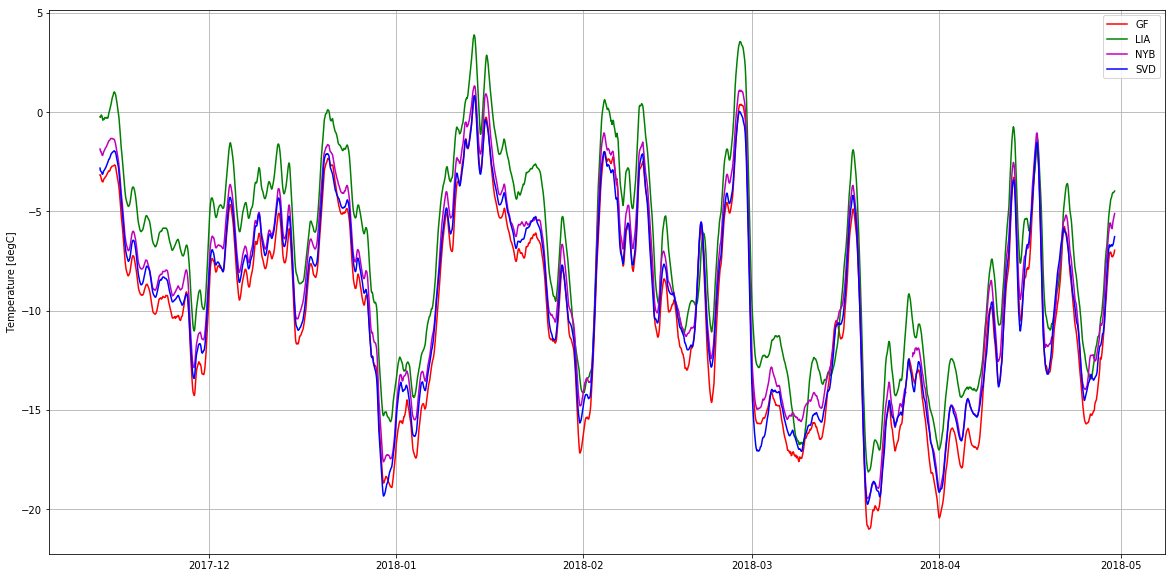

In [8]:
# Plot temperature series, all AWS, rolling mean 
plt.figure(figsize = (20,10))
# plt.plot(AVD_data.T2m_Rotron_Avg.rolling('24h').mean(),'k-',label = 'AVD')
plt.plot(GF_data.T3m_minutt_Avg.rolling('24h').mean(),'r-',label = 'GF')
plt.plot(LIA_data.AirTC.resample('H').mean().rolling('24h').mean(),'g-', label = 'LIA') # resample data to get hourly values, then calc the rolling mean
plt.plot(NYB_data.AirTC.resample('H').mean().rolling('24h').mean(),'m-', label = 'NYB')
plt.plot(SVD_data.AirTC.resample('H').mean().rolling('24h').mean(),'b-', label = 'SVD')
plt.legend()
plt.grid()
plt.ylabel('Temperature [degC]')
# plt.savefig('figures/T_timeseries_example.png', bbox_inches='tight')

In [9]:
# Calculate temperature differences (hourly values) between GF and other stations, 
TdiffSVD = (GF_data.T3m_minutt_Avg + 273.15) - (SVD_data.AirTC.resample('H').mean() + 273.15) # resample data to hourly values
TdiffNYB = (GF_data.T3m_minutt_Avg + 273.15) - (NYB_data.AirTC.resample('H').mean() + 273.15)
TdiffLIA = (GF_data.T3m_minutt_Avg + 273.15) - (LIA_data.AirTC.resample('H').mean() + 273.15)
TdiffAVD = (GF_data.T3m_minutt_Avg + 273.15) - (AVD_data.T2m_Rotron_Avg + 273.14)


Text(0,0.5,'Temperature difference [degC]')

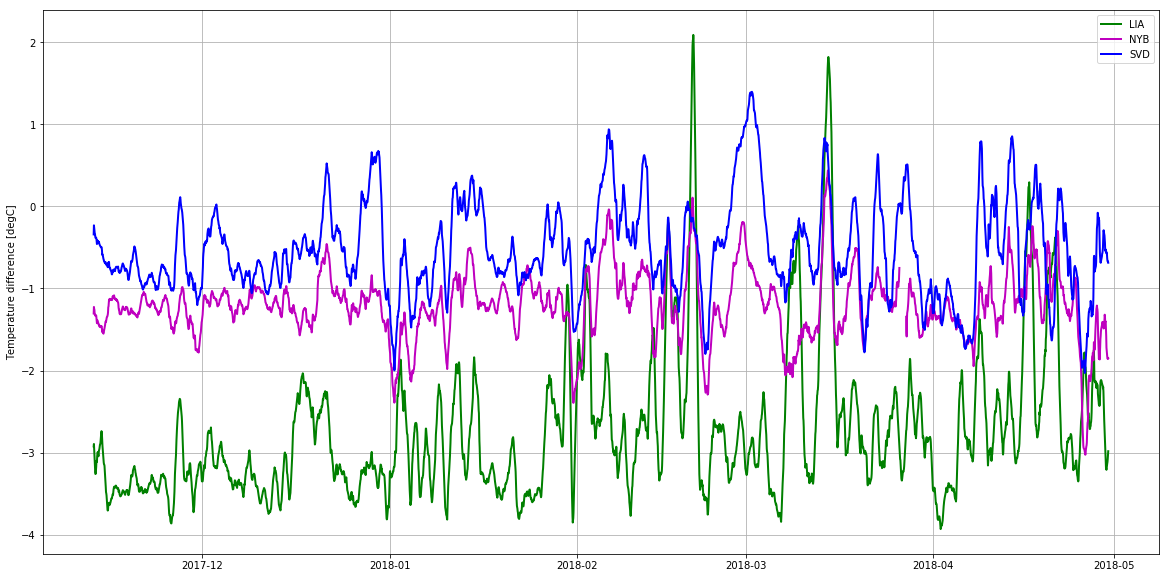

In [10]:
# Plot temperature differences (hourly), 24h rolling mean
plt.figure(figsize = (20,10))
# plt.plot(TdiffAVD.rolling('24h').mean(),'k-',label = 'AVD')
plt.plot(TdiffLIA.rolling('24H').mean(),'g-',linewidth = 2, label = 'LIA')
plt.plot(TdiffNYB.rolling('24H').mean(),'m-',linewidth = 2,  label = 'NYB')
plt.plot(TdiffSVD.rolling('24H').mean(),'b-',linewidth = 2,  label = 'SVD')
plt.legend()
plt.grid()
plt.ylabel('Temperature difference [degC]')

In [11]:
# # Plot daily mean temperature differences
# plt.figure(figsize = (20,10))
# plt.plot(TdiffAVD.resample('D').mean(),'k-',label = 'AVD')
# plt.plot(TdiffLIA.resample('D').mean(),'g-',linewidth = 2, label = 'LIA')
# plt.plot(TdiffNYB.resample('D').mean(),'m-',linewidth = 2,  label = 'NYB')
# plt.plot(TdiffSVD.resample('D').mean(),'b-',linewidth = 2,  label = 'SVD')
# plt.legend()
# plt.grid()
# plt.ylabel('Daily mean temperatur diff [degC]')

In [12]:
# Calculate temperature gradient per m, GF [464masl], NYB[360masl], LIA[100masl], SVD[450masl], AVD[15masl]
gradT_NYB = TdiffNYB/(464 - 360)
gradT_LIA = TdiffLIA/(464 - 100)
gradT_SVD = TdiffSVD/(464 - 450)
gradT_AVD = TdiffAVD/(464 - 15)

In [13]:
# # PLot daily mean temperature gradient
# plt.figure(figsize = (20,10))
# # plt.plot(gradT_AVD.resample('D').mean(),'k-',label = 'AVD')
# plt.plot(gradT_LIA.resample('24H').mean(),'g-',linewidth = 2, label = 'LIA')
# plt.plot(gradT_NYB.resample('24H').mean(),'m-',linewidth = 2,  label = 'NYB')
# # plt.plot(gradT_SVD.resample('D').mean(),'b-',linewidth = 2,  label = 'SVD')
# plt.legend()
# plt.grid()
# plt.ylabel('Daily mean temperature gradient [degC/m]')

In [17]:
# Calculate average temperature gradients
gradT_LIA_avg = gradT_LIA.describe()
print('GF/LIA Summary, whole season:', gradT_LIA_avg)
gradT_LIA_mavg = gradT_LIA.resample('M').mean()
print('GF/LIA monthly temperature gradients:\n', gradT_LIA_mavg)
gradT_NYB_avg = gradT_NYB.describe()
print('GF/NYB Summary, whole season:', gradT_NYB_avg)
gradT_NYB_mavg = gradT_NYB.resample('M').mean()
print('GF/NYB monthly temperature gradients:\n', gradT_NYB_mavg)
gradT_SVD_avg = gradT_SVD.describe()
print('GF/SVD Summary, whole season:', gradT_SVD_avg)
gradT_SVD_mavg = gradT_SVD.resample('M').mean()
print('GF/SVD monthly temperature gradients:\n', gradT_SVD_mavg)
gradT_AVD_avg = gradT_AVD.describe()
print('GF/AVD Summary, whole season:', gradT_AVD_avg)
gradT_AVD_mavg = gradT_AVD.resample('M').mean()
print('GF/AVD monthly temperature gradients:\n', gradT_AVD_mavg)

GF/LIA Summary, whole season: count    4033.000000
mean       -0.007522
std         0.003128
min        -0.015678
25%        -0.009508
50%        -0.008320
75%        -0.006296
max         0.010868
dtype: float64
GF/LIA monthly temperature gradients:
 TIMESTAMP
2017-11-30   -0.009150
2017-12-31   -0.008583
2018-01-31   -0.008018
2018-02-28   -0.006561
2018-03-31   -0.006672
2018-04-30   -0.006689
Freq: M, dtype: float64
GF/LIA monthly temperature gradient standard deviation:
 0.0031283616828505544
GF/NYB Summary, whole season: count    3984.000000
mean       -0.011599
std         0.006707
min        -0.065516
25%        -0.014665
50%        -0.011312
75%        -0.008205
max         0.019438
dtype: float64
GF/NYB monthly temperature gradients:
 TIMESTAMP
2017-11-30   -0.012433
2017-12-31   -0.011231
2018-01-31   -0.012402
2018-02-28   -0.009885
2018-03-31   -0.011574
2018-04-30   -0.012297
Freq: M, dtype: float64
GF/NYB monthly temperature gradient standard deviation:
 0.00670677089387

In [ ]:
# Scatter plot, plot data from different AWS against GF
f1, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(GF_data.T3m_minutt_Avg,
                                                               LIA_data.AirTC.resample('H').mean())
ax1.plot(GF_data.T3m_minutt_Avg, LIA_data.AirTC.resample('H').mean(), 'o', label='GF vs. LIA', alpha =0.5)
ax1.plot(GF_data.T3m_minutt_Avg, intercept1 + slope1*GF_data.T3m_minutt_Avg, 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('T3m GF [degC]')
ax1.set_ylabel('T LIA [degC]')
ax1.set_xlim(-25,5)
ax1.set_ylim(-25,5)
ax1.grid()
ax1.text(-23, 3, 'y = '+str(intercept1.round(2))+'+'+str(slope1.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax1.text(-23, 0, 'R ='+str(r_value1.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(GF_data.T3m_minutt_Avg,
                                                               AVD_data.T2m_Rotron_Avg)
ax2.plot(GF_data.T3m_minutt_Avg, AVD_data.T2m_Rotron_Avg, 'o', label='GF vs. AVD', alpha =0.5)
ax2.plot(GF_data.T3m_minutt_Avg, intercept2 + slope2*GF_data.T3m_minutt_Avg, 'r', label='lin. Regression')
ax2.legend(loc ='lower right')
ax2.set_xlabel('T3m GF [degC]')
ax2.set_ylabel('T2m AVD [degC]')
ax2.set_xlim(-25,5)
ax2.set_ylim(-25,5)
ax2.grid()
ax2.text(-23, 3, 'y = '+str(intercept2.round(2))+'+'+str(slope2.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax2.text(-23, 0, 'R ='+str(r_value2.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(GF_data.T3m_minutt_Avg,
                                                               SVD_data.AirTC.resample('H').mean())
ax3.plot(GF_data.T3m_minutt_Avg, SVD_data.AirTC.resample('H').mean(), 'o', label='GF vs. SVD', alpha =0.5)
ax3.plot(GF_data.T3m_minutt_Avg, intercept3 + slope3*GF_data.T3m_minutt_Avg, 'r', label='lin. Regression')
ax3.legend(loc ='lower right')
ax3.set_xlabel('T3m GF [degC]')
ax3.set_ylabel('T SVD [degC]')
ax3.set_xlim(-25,5)
ax3.set_ylim(-25,5)
ax3.grid()
ax3.text(-23, 3, 'y = '+str(intercept3.round(2))+'+'+str(slope3.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax3.text(-23, 0, 'R ='+str(r_value3.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

            
mask = ~np.isnan(GF_data.T3m_minutt_Avg) & ~np.isnan(NYB_data.AirTC.resample('H').mean())
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(GF_data.T3m_minutt_Avg[mask],
                                                               NYB_data.AirTC.resample('H').mean()[mask])
                                                               
ax4.plot(GF_data.T3m_minutt_Avg[mask], NYB_data.AirTC.resample('H').mean()[mask],'o', label='GF vs. NYB', alpha =0.5)
ax4.plot(GF_data.T3m_minutt_Avg[mask], intercept4 + slope4*GF_data.T3m_minutt_Avg[mask], 'r',
         label='lin. Regression')
ax4.legend(loc ='lower right')
ax4.set_xlabel('T3m GF [degC]')
ax4.set_ylabel('T NYB [degC]')
ax4.set_xlim(-25,5)
ax4.set_ylim(-25,5)
ax4.grid()
ax4.text(-23, 3, 'y = '+str(intercept4.round(2))+'+'+str(slope4.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax4.text(-23, 0, 'R ='+str(r_value4.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)



In [ ]:
# Plot timeseries of relative humidity

plt.figure(figsize = (20,10))
# plt.plot(AVD_data.LF2m_Rotron_Avg.rolling('24h').mean(),'k-',label = 'AVD')
plt.plot(GF_data.LF_minutt_Avg.rolling('24h').mean(),'r-',label = 'GF')
# plt.plot(LIA_data.RH.resample('H').mean().rolling('24h').mean(),'g-', label = 'LIA') # resample data to get hourly values, then calc the rolling mean
plt.plot(NYB_data.RH.resample('H').mean().rolling('24h').mean(),'m-', label = 'NYB')
plt.plot(SVD_data.RH.resample('H').mean().rolling('24h').mean(),'b-', label = 'SVD')
plt.legend()
plt.grid()
plt.ylim(35,100)
plt.ylabel('Rel. Humidity [%]')

In [ ]:
# Calculate relative humidity differences (hourly values) between GF and other stations, 
RHdiffSVD = GF_data.LF_minutt_Avg - SVD_data.RH.resample('H').mean() # resample data to hourly values
RHdiffNYB = GF_data.LF_minutt_Avg - NYB_data.RH.resample('H').mean()
RHdiffLIA = GF_data.LF_minutt_Avg - LIA_data.RH.resample('H').mean()
RHdiffAVD = GF_data.LF_minutt_Avg - AVD_data.LF2m_Rotron_Avg

In [ ]:
# Plot RH differences (hourly), 24h rolling mean
plt.figure(figsize = (20,10))
# plt.plot(RHdiffAVD.rolling('24h').mean(),'k-',label = 'AVD')
plt.plot(RHdiffLIA.rolling('24H').mean(),'g-',linewidth = 2, label = 'LIA')
plt.plot(RHdiffNYB.rolling('24H').mean(),'m-',linewidth = 2,  label = 'NYB')
plt.plot(RHdiffSVD.rolling('24H').mean(),'b-',linewidth = 2,  label = 'SVD')
plt.legend()
plt.grid()
plt.ylabel('Relative Humidity Diff. [%]')

In [ ]:
# # Calculate RH gradient per m, GF [464masl], NYB[360masl], LIA[100masl], SVD[450masl], AVD[15masl]
# gradRH_NYB = RHdiffNYB/(464 - 360)
# gradRH_LIA = RHdiffLIA/(464 - 100)
# gradRH_SVD = RHdiffSVD/(464 - 450)
# gradRH_AVD = RHdiffAVD/(464 - 15)

In [ ]:
# # Calculate average RH gradients
# gradRH_LIA_avg = gradRH_LIA.mean()
# print('GF/LIA Mean RH gradient, whole season:', gradRH_LIA_avg)
# gradRH_LIA_mavg = gradRH_LIA.resample('M').mean()
# print('GF/LIA monthly RH gradients:\n', gradRH_LIA_mavg)
# gradRH_NYB_avg = gradRH_NYB.mean()
# print('GF/NYB Mean RH gradient, whole season:', gradRH_NYB_avg)
# gradRH_NYB_mavg = gradRH_NYB.resample('M').mean()
# print('GF/NYB monthly RH gradients:\n', gradRH_NYB_mavg)
# gradRH_SVD_avg = gradRH_SVD.mean()
# print('GF/SVD Mean RH gradient, whole season:', gradRH_SVD_avg)
# gradRH_SVD_mavg = gradRH_SVD.resample('M').mean()
# print('GF/SVD monthly RH gradients:\n', gradRH_SVD_mavg)
# gradRH_AVD_avg = gradRH_AVD.mean()
# print('GF/AVD Mean RH gradient, whole season:', gradRH_AVD_avg)
# gradRH_AVD_mavg = gradRH_AVD.resample('M').mean()
# print('GF/AVD monthly RH gradients:\n', gradRH_AVD_mavg)

In [ ]:
# # Plot daily mean RH differences
# plt.figure(figsize = (20,10))
# # plt.plot(RHdiffAVD.resample('D').mean(),'k-',label = 'AVD')
# plt.plot(RHdiffLIA.resample('D').mean(),'g-',linewidth = 2, label = 'LIA')
# plt.plot(RHdiffNYB.resample('D').mean(),'m-',linewidth = 2,  label = 'NYB')
# plt.plot(RHdiffSVD.resample('D').mean(),'b-',linewidth = 2,  label = 'SVD')
# plt.legend()
# plt.grid()
# plt.ylabel('Daily mean RH diff [%]')

In [ ]:
# Scatter plot, plot data from different AWS against GF
f1, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(GF_data.LF_minutt_Avg,
                                                               LIA_data.RH.resample('H').mean())
ax1.plot(GF_data.LF_minutt_Avg, LIA_data.RH.resample('H').mean(), 'o', label='GF vs. LIA', alpha =0.5)
ax1.plot(GF_data.LF_minutt_Avg, intercept1 + slope1*GF_data.LF_minutt_Avg, 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('LF GF [%]')
ax1.set_ylabel('LF LIA [%]')
ax1.set_xlim(20,100)
ax1.set_ylim(20,100)
ax1.grid()
ax1.text(23, 98, 'y = '+str(intercept1.round(2))+'+'+str(slope1.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax1.text(23, 90, 'R ='+str(r_value1.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(GF_data.LF_minutt_Avg,
                                                               AVD_data.LF2m_Rotron_Avg)
ax2.plot(GF_data.LF_minutt_Avg, AVD_data.LF2m_Rotron_Avg, 'o', label='GF vs. AVD', alpha =0.5)
ax2.plot(GF_data.LF_minutt_Avg, intercept2 + slope2*GF_data.LF_minutt_Avg, 'r', label='lin. Regression')
ax2.legend(loc ='lower right')
ax2.set_xlabel('LF GF [%]')
ax2.set_ylabel('LF2m AVD [%]')
ax2.set_xlim(20,100)
ax2.set_ylim(20,100)
ax2.grid()
ax2.text(23, 98, 'y = '+str(intercept2.round(2))+'+'+str(slope2.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax2.text(23, 90, 'R ='+str(r_value2.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(GF_data.LF_minutt_Avg,
                                                               SVD_data.RH.resample('H').mean())
ax3.plot(GF_data.LF_minutt_Avg, SVD_data.RH.resample('H').mean(), 'o', label='GF vs. SVD', alpha =0.5)
ax3.plot(GF_data.LF_minutt_Avg, intercept3 + slope3*GF_data.LF_minutt_Avg, 'r', label='lin. Regression')
ax3.legend(loc ='lower right')
ax3.set_xlabel('LF GF [degC]')
ax3.set_ylabel('LF SVD [degC]')
ax3.set_xlim(20,100)
ax3.set_ylim(20,100)
ax3.grid()
ax3.text(23, 98, 'y = '+str(intercept3.round(2))+'+'+str(slope3.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax3.text(23, 90, 'R ='+str(r_value3.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)

            
mask = ~np.isnan(GF_data.LF_minutt_Avg) & ~np.isnan(NYB_data.RH.resample('H').mean())
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(GF_data.LF_minutt_Avg[mask],
                                                               NYB_data.RH.resample('H').mean()[mask])
                                                               
ax4.plot(GF_data.LF_minutt_Avg[mask], NYB_data.RH.resample('H').mean()[mask],'o', label='GF vs. NYB', alpha =0.5)
ax4.plot(GF_data.LF_minutt_Avg[mask], intercept4 + slope4*GF_data.LF_minutt_Avg[mask], 'r',
         label='lin. Regression')
ax4.legend(loc ='lower right')
ax4.set_xlabel('T3m GF [degC]')
ax4.set_ylabel('T NYB [degC]')
ax4.set_xlim(20,100)
ax4.set_ylim(20,100)
ax4.grid()
ax4.text(23, 98, 'y = '+str(intercept4.round(2))+'+'+str(slope4.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
ax4.text(23, 90, 'R ='+str(r_value4.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)



In [ ]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(GF_data.LF_minutt_Avg,NYB_data.RH.resample('H').mean())
# plt.figure(figsize = (10,10))
# plt.plot(GF_data.LF_minutt_Avg, NYB_data.RH.resample('H').mean(), 'o', label='GF vs. NYB', alpha =0.5)
# plt.plot(GF_data.LF_minutt_Avg, intercept + slope*GF_data.LF_minutt_Avg, 'r', label='lin. Regression')
# plt.legend(loc ='lower right')
# plt.xlabel('T3m GF [degC]')
# plt.ylabel('NYB [degC]')
# plt.xlim(0,100)
# plt.ylim(0,100)
# plt.text(-33, 17, 'y = '+str(intercept.round(2))+'+'+str(slope.round(2))+'*x', 
#          verticalalignment='top', horizontalalignment='left', fontsize = 15)
# plt.text(-33, 13, 'R ='+str(r_value.round(2)), 
#          verticalalignment='top', horizontalalignment='left', fontsize = 15)
# # f11.savefig('figures/T_GF1mvsAVD2m.png', bbox_inches='tight')